In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("data/fake_news_full_data.csv")
df.head()

,Unnamed: 0,title,text,date,is_fake
0,0,Earthquake hits off Papua New Guinea,LONDON (Reuters) - A magnitude 5.9 earthquake ...,"September 17, 2017",0
1,1,CINDY MCCAIN Reportedly Accepts Trump Administ...,The Hill released controversial comments sore ...,"Jun 12, 2017",1
2,2,Prosecutors say ex-House Speaker Hastert sexua...,(Reuters) - Former U.S. House Speaker Dennis H...,"April 9, 2016",0
3,3,Romanian protesters halt building of Xmas fair...,BUCHAREST (Reuters) - Romanian protesters clas...,"December 2, 2017",0
4,4,"Congo elected to U.N. rights council; Britain,...",UNITED NATIONS (Reuters) - Democratic Republic...,"October 16, 2017",0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44680 entries, 0 to 44679
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44680 non-null  int64 
 1   title       44680 non-null  object
 2   text        44680 non-null  object
 3   date        44680 non-null  object
 4   is_fake     44680 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


In [64]:
df.is_fake.value_counts(normalize=True)

is_fake
1    0.525269
0    0.474731
Name: proportion, dtype: float64

In [65]:
def uni_cat_target_compare_sub(df, column, ax):
    bi_cat_countplot_sub(df, column, hue_column='is_fake', ax=ax)

def bi_cat_countplot_sub(df, column, hue_column, ax, size=20):
    unique_hue_values = df[hue_column].unique()

    pltname = f'Normalised distribution of values by category: {column}'
    proportions = df.groupby([hue_column, column]).size().unstack(hue_column, fill_value=0)
    proportions = (proportions * 100 / proportions.sum()).round(2)
    plot = proportions.sort_index().sort_values(
        by=unique_hue_values[0], ascending=False
    ).plot.bar(ax=ax, title=pltname)

    # анотація значень в барплоті
    for container in plot.containers:
        plot.bar_label(container, fmt='%1.1f%%')

    # Sort x-labels by alphabet
    # ax.set_xticklabels(sorted(ax.get_xticklabels(), key=lambda label: label.get_text()))    

In [66]:
# Count words with all capital letters in df.title
import re

def count_all_caps_words(title_column):
    return title_column.apply(lambda x: len(re.findall(r'\b[A-Z]+\b', str(x))))

# Apply the function to the 'title' column
df['all_caps_word_count'] = count_all_caps_words(df['title'])



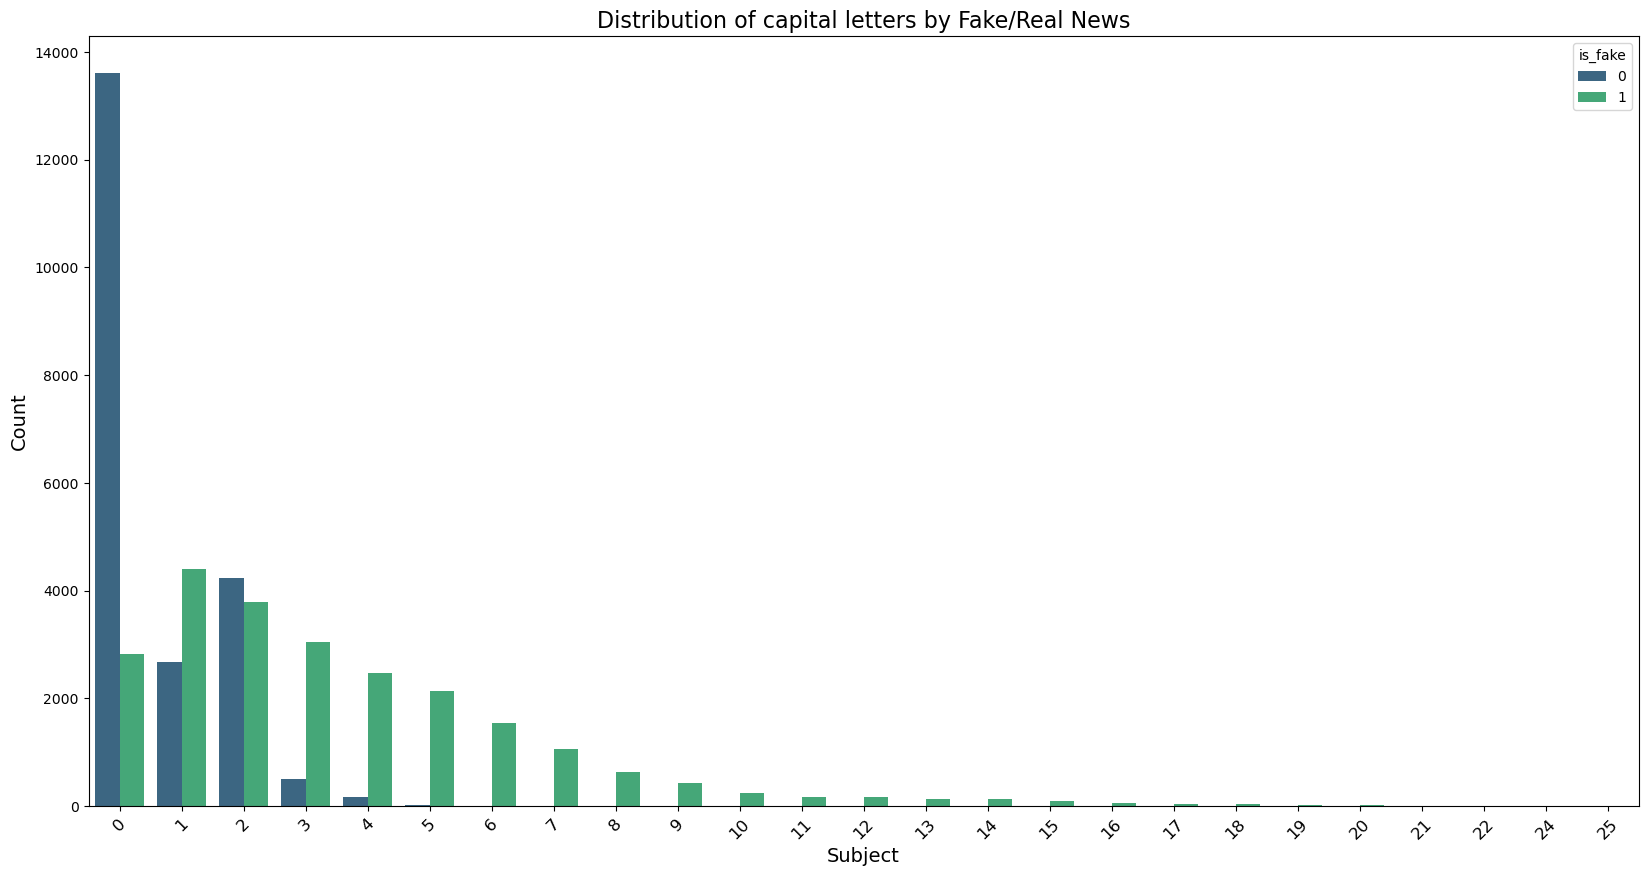

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 10))

# Create the bar plot
sns.countplot(data=df, x='all_caps_word_count', hue='is_fake', palette='viridis')

# Add labels and title
plt.title('Distribution of capital letters by Fake/Real News', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()


In [68]:
# Convert abbreviations to lowercase in the 'text' and 'title' columns
df['title_lower'] = df['title'].str.replace(r'\b(U\.S\.A|U\.S|U\.N)\b', lambda x: x.group(0).lower(), regex=True)
# df['title_lower'] = df['title'].str.replace(r'\b(U\.S\.A|U\.S|U\.N)\b', lambda x: x.group(0).lower(), regex=True)

In [69]:
# Apply the function to the 'title' column
df['LOW_all_caps_word_count'] = count_all_caps_words(df['title_lower'])

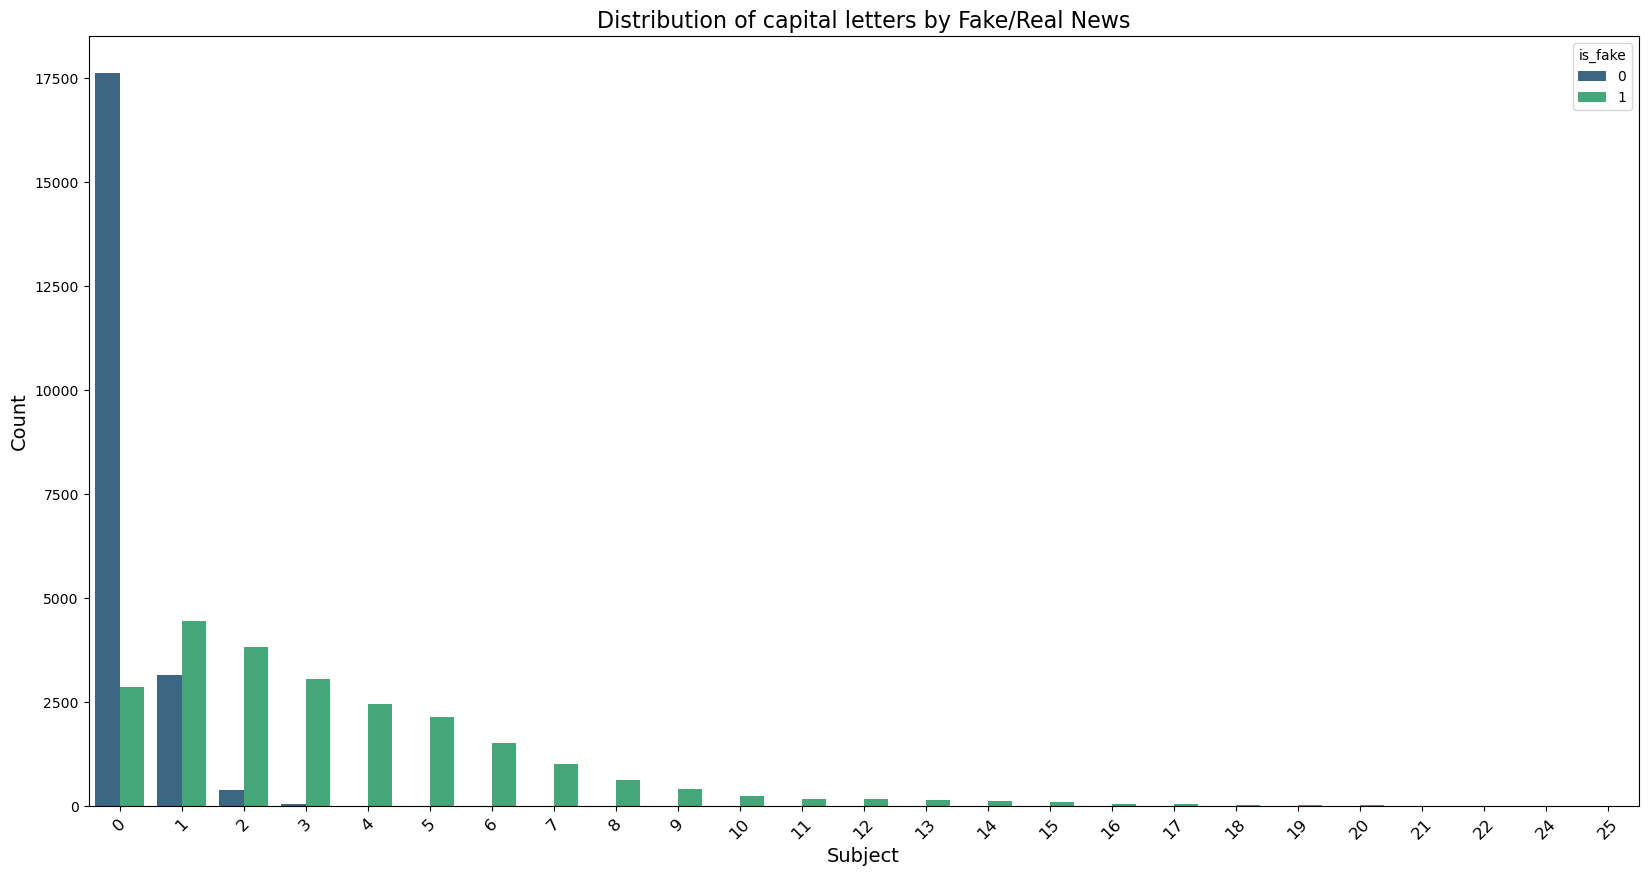

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 10))

# Create the bar plot
sns.countplot(data=df, x='LOW_all_caps_word_count', hue='is_fake', palette='viridis')

# Add labels and title
plt.title('Distribution of capital letters by Fake/Real News', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [71]:
df[df['is_fake']==0].LOW_all_caps_word_count.value_counts().sort_index()

LOW_all_caps_word_count
0    17624
1     3154
2      378
3       44
4       11
Name: count, dtype: int64

In [72]:
df[df['is_fake']==1].LOW_all_caps_word_count.value_counts().sort_index()

LOW_all_caps_word_count
0     2871
1     4460
2     3820
3     3060
4     2462
5     2147
6     1509
7     1008
8      622
9      417
10     248
11     164
12     164
13     135
14     122
15      87
16      54
17      47
18      25
19      18
20      15
21       6
22       2
24       4
25       2
Name: count, dtype: int64

In [73]:
df['pred_lower'] = df['LOW_all_caps_word_count'].apply(lambda x: 0 if x <= 4 else 1)
df

,Unnamed: 0,title,text,date,is_fake,all_caps_word_count,title_lower,LOW_all_caps_word_count,pred_lower
0,0,Earthquake hits off Papua New Guinea,LONDON (Reuters) - A magnitude 5.9 earthquake ...,"September 17, 2017",0,0,Earthquake hits off Papua New Guinea,0,0
1,1,CINDY MCCAIN Reportedly Accepts Trump Administ...,The Hill released controversial comments sore ...,"Jun 12, 2017",1,2,CINDY MCCAIN Reportedly Accepts Trump Administ...,2,0
2,2,Prosecutors say ex-House Speaker Hastert sexua...,(Reuters) - Former U.S. House Speaker Dennis H...,"April 9, 2016",0,0,Prosecutors say ex-House Speaker Hastert sexua...,0,0
3,3,Romanian protesters halt building of Xmas fair...,BUCHAREST (Reuters) - Romanian protesters clas...,"December 2, 2017",0,0,Romanian protesters halt building of Xmas fair...,0,0
4,4,"Congo elected to U.N. rights council; Britain,...",UNITED NATIONS (Reuters) - Democratic Republic...,"October 16, 2017",0,4,"Congo elected to u.n. rights council; Britain,...",0,0
...,...,...,...,...,...,...,...,...,...
44675,44675,"In new blow to campaign, Trump's foundation or...",WASHINGTON (Reuters) - New York’s attorney gen...,"October 3, 2016",0,0,"In new blow to campaign, Trump's foundation or...",0,0
44676,44676,MICHELLE OBAMA’S Middle East Speech: Compares ...,Michelle Obama received $70 million dollars fr...,"Nov 6, 2015",1,4,MICHELLE OBAMA’S Middle East Speech: Compares ...,4,0
44677,44677,LEFTY COMMUNIST Calls Trump-Supporting High Sc...,"If you haven t discovered Austen Fletcher yet,...","Nov 3, 2017",1,3,LEFTY COMMUNIST Calls Trump-Supporting High Sc...,3,0
44678,44678,SWISS ARMY CHIEF WARNS CITIZENS About Explosiv...,Wouldn t it be great if we had someone in gove...,"Dec 31, 2015",1,5,SWISS ARMY CHIEF WARNS CITIZENS About Explosiv...,5,1


In [74]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(df['is_fake'], df['pred_lower'])
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(df['is_fake'], df['pred_lower']))

Confusion Matrix:
[[21211     0]
 [16673  6796]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72     21211
           1       1.00      0.29      0.45     23469

    accuracy                           0.63     44680
   macro avg       0.78      0.64      0.58     44680
weighted avg       0.79      0.63      0.58     44680



In [75]:
import re

# Extract month names (full or abbreviated) from the 'date' column
df['month_name'] = df['date'].apply(
    lambda x: re.search(r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\b', str(x)).group(0)
    if pd.notna(x) and re.search(r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\b', str(x))
    else None
)

# replace month names with their full names
month_replacements = {
    'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April',
    'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August',
    'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'
}
df['month_name'] = df['month_name'].replace(month_replacements)

# Display the extracted month names
df

,Unnamed: 0,title,text,date,is_fake,all_caps_word_count,title_lower,LOW_all_caps_word_count,pred_lower,month_name
0,0,Earthquake hits off Papua New Guinea,LONDON (Reuters) - A magnitude 5.9 earthquake ...,"September 17, 2017",0,0,Earthquake hits off Papua New Guinea,0,0,September
1,1,CINDY MCCAIN Reportedly Accepts Trump Administ...,The Hill released controversial comments sore ...,"Jun 12, 2017",1,2,CINDY MCCAIN Reportedly Accepts Trump Administ...,2,0,June
2,2,Prosecutors say ex-House Speaker Hastert sexua...,(Reuters) - Former U.S. House Speaker Dennis H...,"April 9, 2016",0,0,Prosecutors say ex-House Speaker Hastert sexua...,0,0,April
3,3,Romanian protesters halt building of Xmas fair...,BUCHAREST (Reuters) - Romanian protesters clas...,"December 2, 2017",0,0,Romanian protesters halt building of Xmas fair...,0,0,December
4,4,"Congo elected to U.N. rights council; Britain,...",UNITED NATIONS (Reuters) - Democratic Republic...,"October 16, 2017",0,4,"Congo elected to u.n. rights council; Britain,...",0,0,October
...,...,...,...,...,...,...,...,...,...,...
44675,44675,"In new blow to campaign, Trump's foundation or...",WASHINGTON (Reuters) - New York’s attorney gen...,"October 3, 2016",0,0,"In new blow to campaign, Trump's foundation or...",0,0,October
44676,44676,MICHELLE OBAMA’S Middle East Speech: Compares ...,Michelle Obama received $70 million dollars fr...,"Nov 6, 2015",1,4,MICHELLE OBAMA’S Middle East Speech: Compares ...,4,0,November
44677,44677,LEFTY COMMUNIST Calls Trump-Supporting High Sc...,"If you haven t discovered Austen Fletcher yet,...","Nov 3, 2017",1,3,LEFTY COMMUNIST Calls Trump-Supporting High Sc...,3,0,November
44678,44678,SWISS ARMY CHIEF WARNS CITIZENS About Explosiv...,Wouldn t it be great if we had someone in gove...,"Dec 31, 2015",1,5,SWISS ARMY CHIEF WARNS CITIZENS About Explosiv...,5,1,December


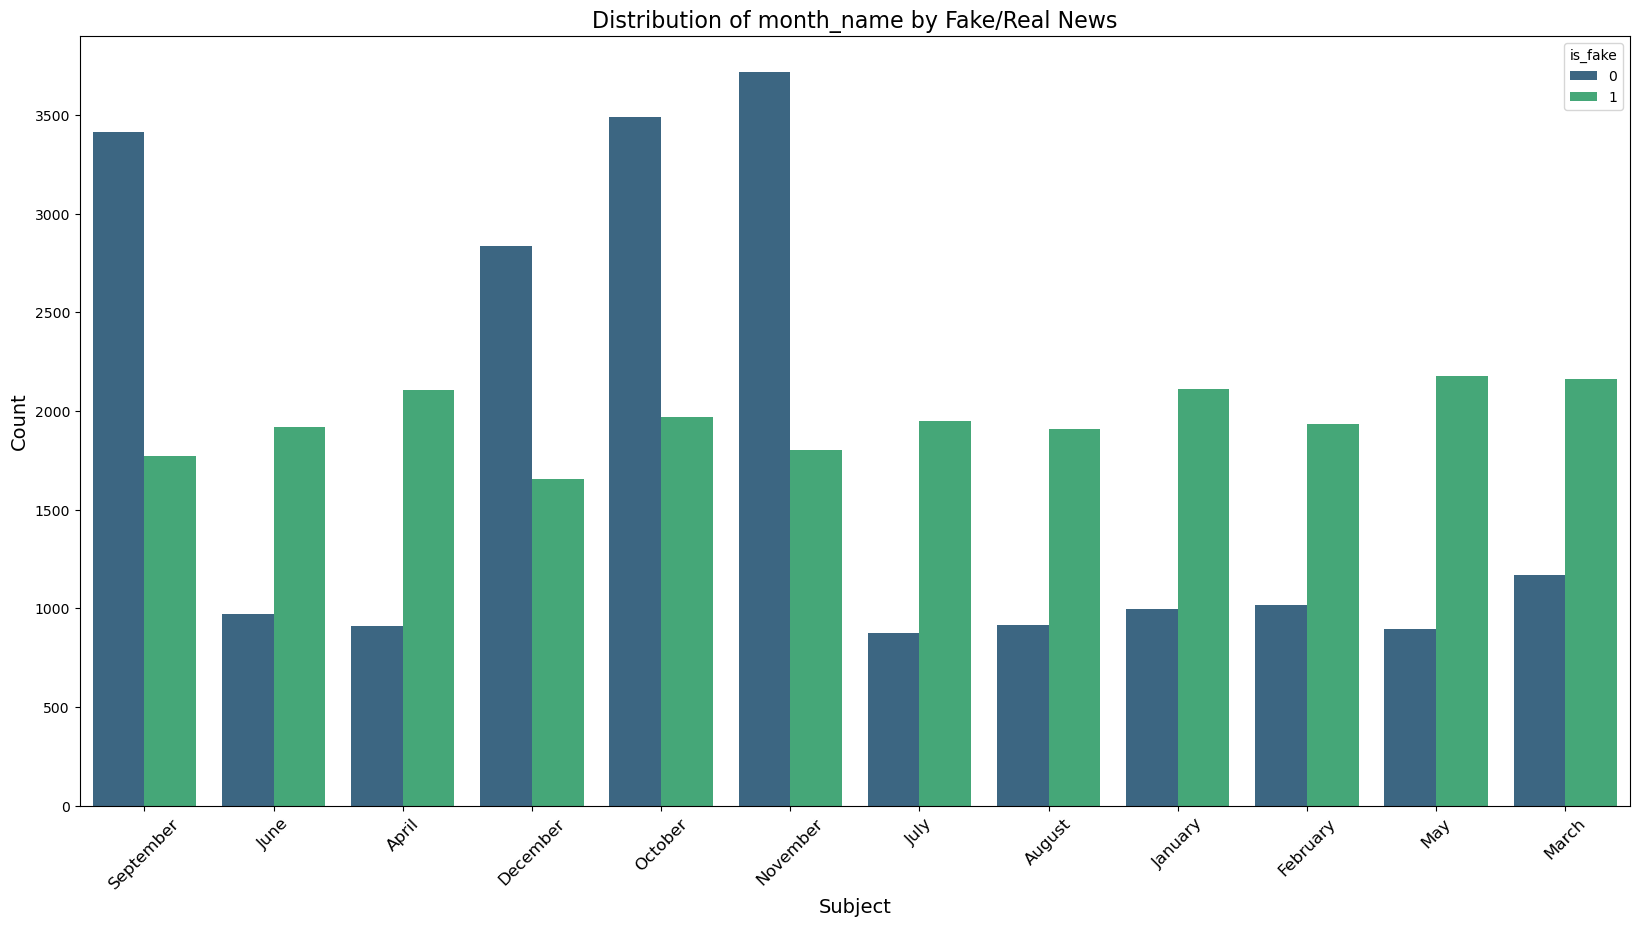

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 10))

# Create the bar plot
sns.countplot(data=df, x='month_name', hue='is_fake', palette='viridis')

# Add labels and title
plt.title('Distribution of month_name by Fake/Real News', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [77]:
df[df.is_fake == 1].month_name.value_counts(normalize=True).sort_index()

month_name
April        0.089824
August       0.081260
December     0.070564
February     0.082410
January      0.089910
July         0.083134
June         0.081856
March        0.092083
May          0.092765
November     0.076785
October      0.083859
September    0.075550
Name: proportion, dtype: float64

In [78]:
df[df.is_fake == 0].month_name.value_counts(normalize=True).sort_index()

month_name
April        0.042949
August       0.043185
December     0.133799
February     0.047947
January      0.046957
July         0.041252
June         0.045872
March        0.055066
May          0.042337
November     0.175192
October      0.164584
September    0.160860
Name: proportion, dtype: float64

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_count(text):
  wordcloud=WordCloud(width=800,height=400,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

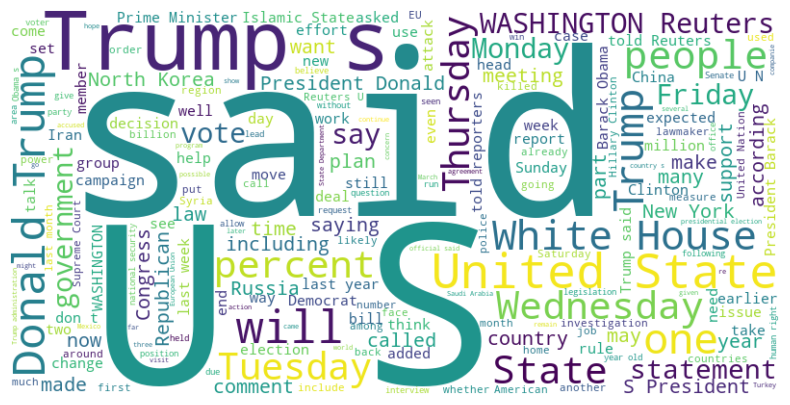

In [80]:
plot_word_count(df[df['is_fake']==0]['text'])

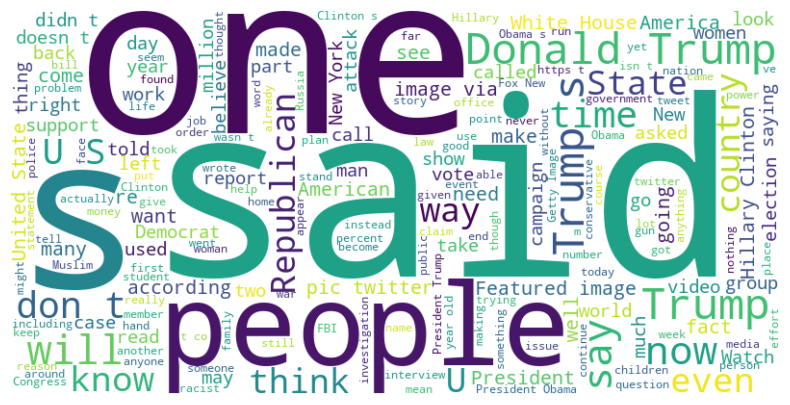

In [81]:
plot_word_count(df[df['is_fake']==1]['text'])

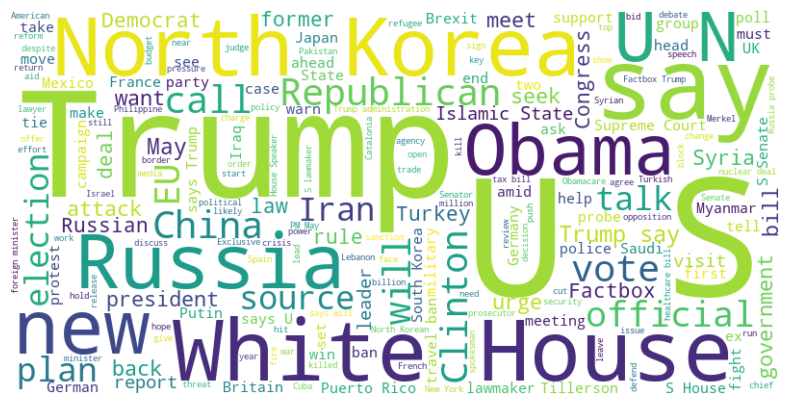

In [24]:
plot_word_count(df[df['is_fake']==0]['title'])

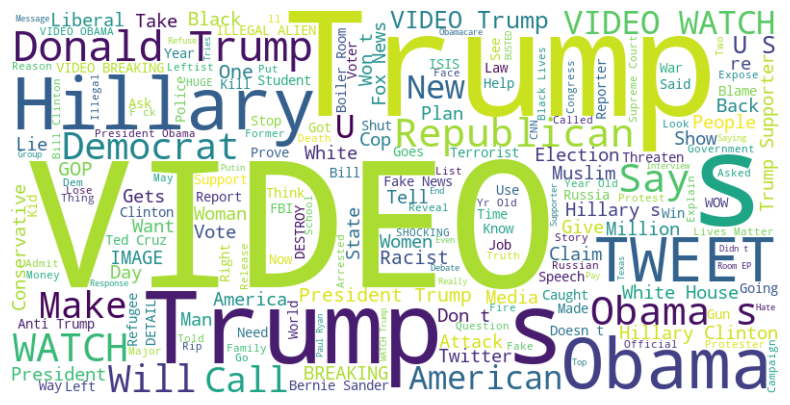

In [25]:
plot_word_count(df[df['is_fake']==1]['title'])

In [82]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem.snowball import SnowballStemmer

In [83]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Olha
[nltk_data]     Shaposhnyk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Olha
[nltk_data]     Shaposhnyk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
english_stopwords = stopwords.words('english')

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

stemmer = SnowballStemmer(language='english')

In [85]:
import re
def tokenize(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'@\w+', '', text) # remove mentions
    text = re.sub(r'#\w+', '', text) # remove hashtags
    text = re.sub(r'[^a-z\s]', '', text) # remove special characters
    tokens = word_tokenize(text)

    tokens = remove_stopwords(tokens)
    stem = [stemmer.stem(word) for word in tokens if word not in english_stopwords] 
    return stem

In [86]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Olha
[nltk_data]     Shaposhnyk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

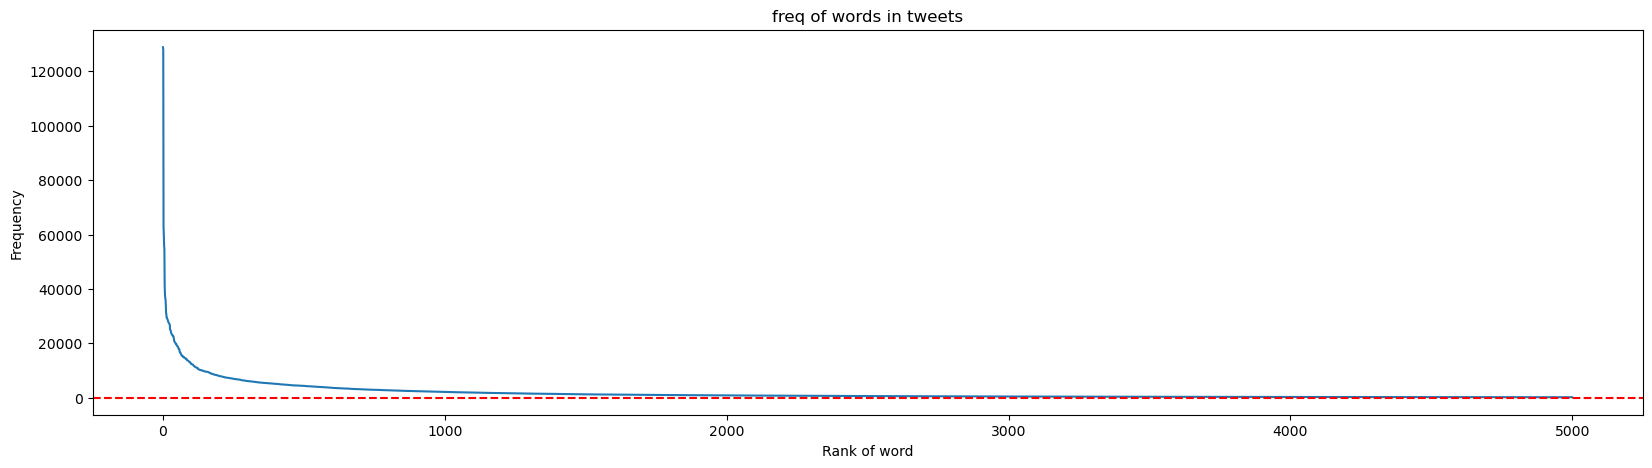

In [48]:
from collections import Counter

all_tokens = []
for doc in df.text: 
    all_tokens.extend(tokenize(doc))

word_freq = Counter(all_tokens)
most_common = word_freq.most_common()
frequencies = [freq for word, freq in most_common]

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(frequencies[:5000])
plt.axhline(y=3, color='r', linestyle='--')

plt.xlabel("Rank of word")
plt.ylabel("Frequency")
plt.title("freq of words in tweets")
plt.show()

In [27]:
len(frequencies)

172967

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer(tokenizer=tokenize, 
                           stop_words=english_stopwords, 
                           max_features=5000, 
                           ngram_range=(1, 2), 
                           lowercase=True,
                           )
vect.fit(df.title)

c:\Users\Olha Shaposhnyk\anaconda3\envs\ml_course\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Olha Shaposhnyk\anaconda3\envs\ml_course\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'hes', 'id', 'ill', 'im', 'isnt', 'itd', 'itll', 'ive', 'mightnt', 'mustnt', 'neednt', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'shouldv', 'thatll', 'theyd', 'theyll', 'theyr', 'theyv', 'wasnt', 'wed', 'well', 'werent', 'weve', 'wont', 'wouldnt', 'youd', 'youll', 'youv'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=5000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x000001B313FB4900>)

In [48]:
vect.get_feature_names_out()[:100], vect.get_feature_names_out()[-100:]

(array(['abadi', 'abandon', 'abba', 'abc', 'abc news', 'abe', 'abedin',
        'abil', 'abl', 'abort', 'abroad', 'abrupt', 'absolut', 'absurd',
        'abus', 'academ', 'accept', 'access', 'accid', 'accident',
        'accomplish', 'accord', 'account', 'accus', 'accus trump',
        'acknowledg', 'aclu', 'across', 'across america', 'act',
        'act like', 'act terror', 'action', 'activ', 'activist', 'actor',
        'actress', 'actual', 'ad', 'ad video', 'adam', 'add', 'addit',
        'address', 'admin', 'administr', 'admiss', 'admit', 'adopt',
        'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis',
        'advisor', 'advisori', 'advoc', 'affair', 'affect', 'afford',
        'afghan', 'afghanistan', 'afraid', 'africa', 'africa zuma',
        'african', 'ag', 'age', 'agenc', 'agenda', 'agent', 'aggress',
        'agit', 'ago', 'agre', 'agreement', 'ahead', 'ahead elect',
        'ahead trump', 'ahol', 'aid', 'aid worker', 'ail', 'aim', 'air',
        'air forc', 'ai

In [49]:
inputs = vect.transform(df.title)    

In [50]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# BoW

In [93]:
train_index, test_index = train_test_split(df.index, test_size=0.2, stratify=df.is_fake, random_state=42)
train_index, test_index = train_test_split(df.index, test_size=0.2, stratify=df.is_fake, random_state=42)

X_train = df.title[train_index]
X_test = df.title[test_index]
#save target variables to samples/ as npy
np.save(os.path.join('samples', 'X_train.npy'), X_train)
np.save(os.path.join('samples', 'X_test.npy'), X_test)

In [ ]:
train_index, test_index = train_test_split(df.index, test_size=0.2, stratify=df.is_fake, random_state=42)



X_train_bow = inputs[train_index]
X_test_bow = inputs[test_index]
#save tha train and test sets to samples/ as npy
np.save(os.path.join('samples', 'X_train_bow.npy'), X_train_bow.toarray())
np.save(os.path.join('samples', 'X_test_bow.npy'), X_test_bow.toarray())

y_train = df.is_fake[train_index]
y_test = df.is_fake[test_index]
#save target variables to samples/ as npy
np.save(os.path.join('samples', 'y_train.npy'), y_train)
np.save(os.path.join('samples', 'y_test.npy'), y_test)

X_train_bow.shape, X_test_bow.shape, y_train.shape, y_test.shape   

((35744, 5000), (8936, 5000), (35744,), (8936,))

In [ ]:
def metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print("Accuracy:", round(acc, 4))
    print("F1 Score:", round(f1, 4))
    return acc, f1

def eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    
    print("Model:", model.__class__.__name__)
    print("Training report:")
    _ = metrics(y_train, model.predict(X_train))

    print("Testing report:")
    _ = metrics(y_test, y_pred_test)   
    
    # print("Accuracy:", accuracy_score(y_test, y_pred))
    # print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.show()
    
    return model

Model: LogisticRegression
Training report:
Accuracy: 0.9723
F1 Score: 0.9723
Testing report:
Accuracy: 0.944
F1 Score: 0.9441


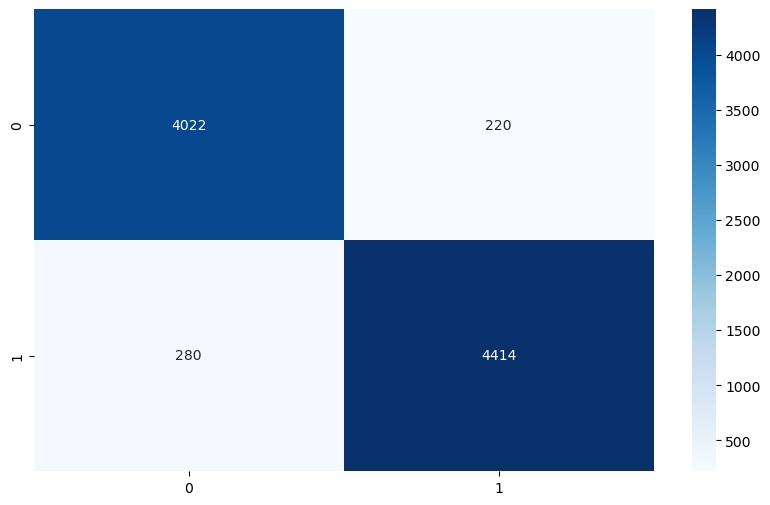

In [53]:
#logidistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg = eval_model(log_reg, X_train_bow, X_test_bow, y_train, y_test)


# tf-idf

In [54]:
tfidf_vect = TfidfVectorizer(tokenizer=tokenize,
                           stop_words=english_stopwords, 
                           max_features=2000, 
                           ngram_range=(1, 2), 
                           lowercase=True
                           )
tfidf_vect.fit(df.title)
inputs_tfidf = tfidf_vect.transform(df.title)
inputs_tfidf.shape, df.shape

c:\Users\Olha Shaposhnyk\anaconda3\envs\ml_course\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Olha Shaposhnyk\anaconda3\envs\ml_course\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'hes', 'id', 'ill', 'im', 'isnt', 'itd', 'itll', 'ive', 'mightnt', 'mustnt', 'neednt', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'shouldv', 'thatll', 'theyd', 'theyll', 'theyr', 'theyv', 'wasnt', 'wed', 'well', 'werent', 'weve', 'wont', 'wouldnt', 'youd', 'youll', 'youv'] not in stop_words.
  warnings.warn(


((44680, 2000), (44680, 10))

In [55]:
X_train_tfidf = inputs_tfidf[train_index]
X_test_tfidf = inputs_tfidf[test_index]

#save the train and test sets to samples/ npy
np.save(os.path.join('samples', 'X_train_tfidf.npy'), X_train_tfidf.toarray())
np.save(os.path.join('samples', 'X_test_tfidf.npy'), X_test_tfidf.toarray())

Model: LogisticRegression
Training report:
Accuracy: 0.9459
F1 Score: 0.9459
Testing report:
Accuracy: 0.9322
F1 Score: 0.9322


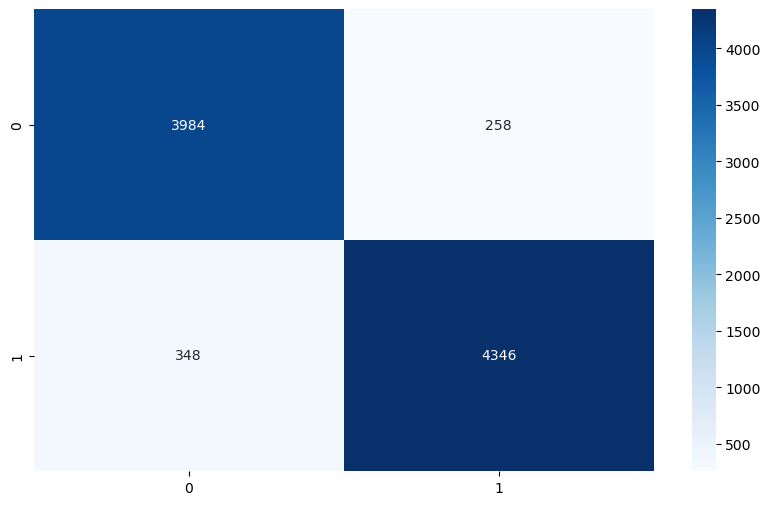

In [56]:
log_reg2 = LogisticRegression(max_iter=1000, random_state=42)
log_reg2 = eval_model(log_reg2, X_train_tfidf, X_test_tfidf, y_train, y_test)

# FastText

Model: LogisticRegression
Training report:
Accuracy: 0.8532
F1 Score: 0.8532
Testing report:
Accuracy: 0.8452
F1 Score: 0.8452


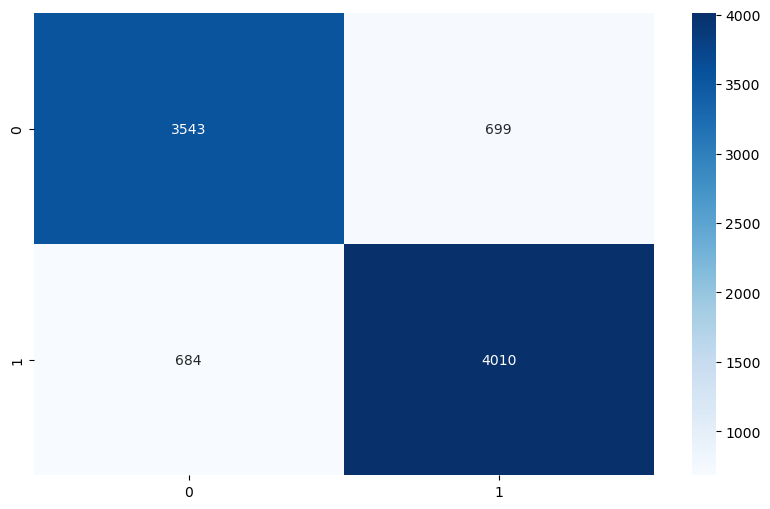

In [57]:
import numpy as np

def load_fasttext_embeddings(fasttext_file_path, max_words=20000):
    embeddings_index = {}
    with open(fasttext_file_path, encoding='utf8', newline='\n', errors='ignore') as f:
        next(f)  # skip header
        for i, line in enumerate(f):
            if i >= max_words:
                break
            values = line.rstrip().split(' ')
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

fasttext_path = 'cc.en.300.vec'  # download dictinati from website
embeddings_index_ft = load_fasttext_embeddings(fasttext_path)

# Create embeddings by averaging word vectors
def get_document_embedding_ft(text, embeddings_index, dim=300):
    words = tokenize(text)
    valid_vectors = [embeddings_index[w] for w in words if w in embeddings_index]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(dim)

X_fasttext = np.vstack(df['title'].apply(lambda x: get_document_embedding_ft(x, embeddings_index_ft)).values)

X_train_fasttext = X_fasttext[train_index]
X_test_fasttext = X_fasttext[test_index]

#save the embeddings to a file 
np.save('samples/X_train_fasttext.npy', X_train_fasttext)
np.save('samples/X_test_fasttext.npy', X_test_fasttext)


log_reg_fasttext = LogisticRegression(max_iter=1000, random_state=42)
log_reg_fasttext = eval_model(log_reg_fasttext, X_train_fasttext, X_test_fasttext, y_train, y_test)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()  # Put model in inference mode


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\Olha Shaposhnyk\anaconda3\envs\ml_course\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Olha Shaposhnyk\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [34]:
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # Mean pooling
    embedding = torch.mean(outputs.last_hidden_state, dim=1)
    return embedding.squeeze().numpy()

# This might take time for large datasets
embeddings = np.array([get_embedding(text) for text in tqdm(df['title'])])



100%|██████████| 44680/44680 [25:33<00:00, 29.13it/s]


In [59]:
embeddings[0]

array([ 4.09896336e-02, -3.01070750e-01, -6.44567013e-01, -1.76590011e-01,
       -1.01930782e-01, -3.12127322e-01,  1.08767033e-01,  6.00962639e-01,
       -4.96094942e-01,  9.85013917e-02,  1.65149018e-01, -5.98080158e-01,
       -3.26323174e-02,  1.74393058e-01, -3.16376239e-01,  3.05895716e-01,
        2.12469473e-01, -1.54524028e-01, -3.70553732e-01,  6.41030490e-01,
        4.07400817e-01, -6.80076718e-01, -1.97776705e-01,  3.13358217e-01,
        6.50863051e-01,  7.06307404e-03, -4.76397663e-01,  2.07779914e-01,
       -3.21444869e-01, -6.34933054e-01,  2.86898404e-01,  1.88519180e-01,
        1.20813459e-01, -9.43154097e-03, -8.92320722e-02,  3.08792859e-01,
        1.09801516e-01, -5.09687886e-02, -2.05059603e-01,  4.04264182e-01,
       -3.18661958e-01, -7.53261864e-01, -6.48608953e-02,  8.25429261e-02,
        2.82029152e-01, -1.92793608e-01,  3.15979034e-01, -4.39210683e-02,
       -2.69569278e-01,  9.24480855e-02,  2.07229674e-01,  3.45453203e-01,
       -1.67075753e-01, -

In [60]:
#save embeddings to a file
np.save('samples/bert_embeddings.npy', embeddings)

In [ ]:
train_index, test_index = train_test_split(df.index, test_size=0.2, stratify=df['is_fake'], random_state=42)

X_train_bert = embeddings[train_index]
X_test_bert = embeddings[test_index]

#save train and test data
np.save('samples/X_train_bert.npy', X_train_bert)
np.save('samples/X_test_bert.npy', X_test_bert)


Model: LogisticRegression
Training report:
Accuracy: 0.976
F1 Score: 0.976
Testing report:
Accuracy: 0.9683
F1 Score: 0.9683


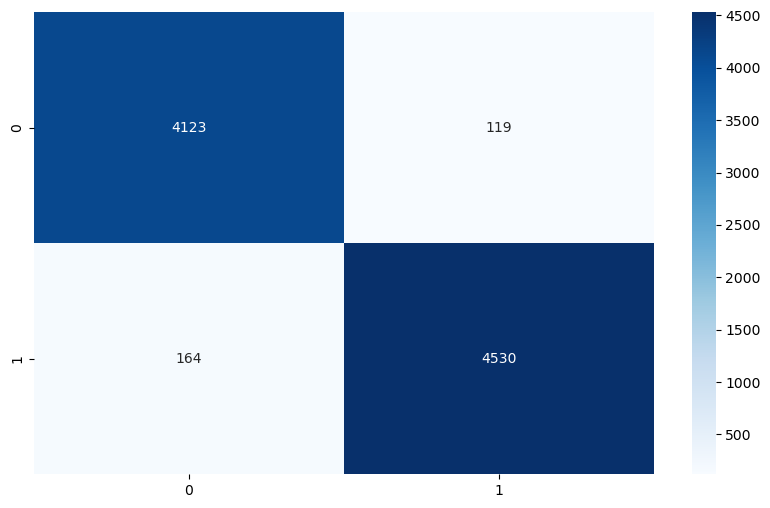

In [40]:
log_reg_bert = LogisticRegression(max_iter=1000, random_state=42)
log_reg_bert = eval_model(log_reg_bert, X_train_bert, X_test_bert, y_train, y_test)